# Outlier

In [55]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :        # Windows OS
    font_family = "Malgun Gothic"
else:                       # MAC OS
    font_family = "AppleGothic"

# '-' 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

## Z검정(Z-Test)을 이용한 이상값 처리

In [56]:
# 3000개의 랜덤 데이터 생성
np_data = np.random.randint(1, 100, size = 3000)
data = list(np_data)

data[0:2]

[57, 30]

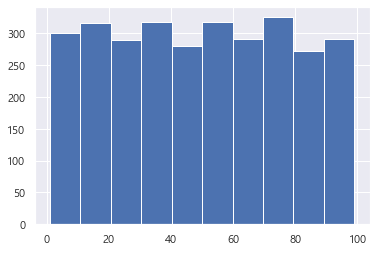

In [57]:
# 히스토그램으로 생성된 데이터 분포 확인
plt.hist(data)
plt.show()

49.48
28.350924735065227


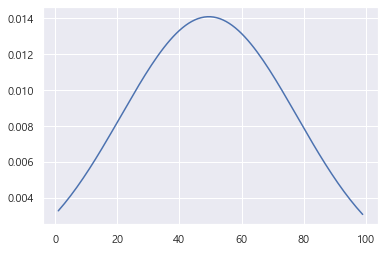

In [58]:
# Data의 정규분포 확인
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

# 확률 밀도 함수 생성
pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

1.0658141036401502e-16
1.0


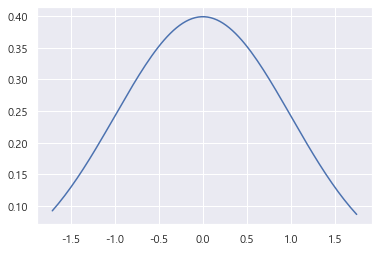

In [59]:
# 표준정규분표(Z분포)로 변환
std_list = []

for i in data:
    z = (i - data_mean) / data_std
    std_list.append(z)
    
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list),
                       ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

49.70299003322259
28.704766369405622


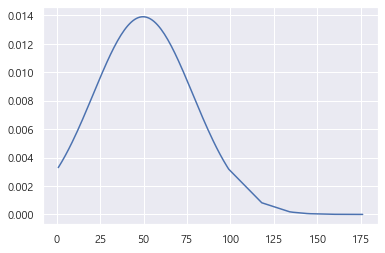

In [60]:
# 데이터셋에 이상값 추가
ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)     # 이상값 생성
    
# 이상값이 추가된 데이터의 정규분포도
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

2.8327285146582064e-17
0.9999999999999998


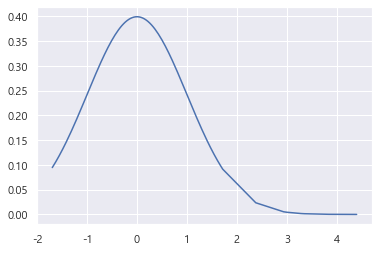

In [61]:
# 이상값 추가된 데이터의 표준화
ol_std_list = []

for i in ol_data:
    z = (i - ol_data_mean) / ol_data_std
    ol_std_list.append(z)
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [62]:
# Z값의 2가 넘어 가는 데이터 삭제

# 전체 라인수 확인
len(ol_std_list)

3010

In [63]:
# -2~2 범위 벗어나면 이상값으로 제거

for i in ol_std_list :
    z = i
    if z > 2 : 
        ol_std_list.remove(z)
    if z < -2 :
        ol_std_list.remove(z)

# 이상값 제거 후 라인수
len(ol_std_list)

3003

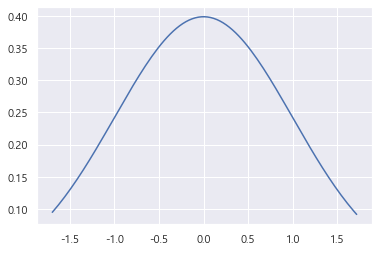

In [64]:
# 이상값 제거 후 표준정규분포 확인
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

### 사분위수 범위로 이상값 삭제

In [65]:
# 이상값 데이터 생성
boxdata = pd.DataFrame(np.random.randn(100, 3), columns=["A열","B열","C열"])

boxdata.head()

,A열,B열,C열
0,-0.605513,2.572056,1.195158
1,0.561039,-1.368083,0.118870
2,-1.014025,-0.263283,-0.198123
3,-0.618033,1.723375,-0.514526
4,-1.738138,1.368261,-1.702696


In [66]:
# 이상값 데이터 확인

# 기술 통계 정보로 pencentile 확인
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.204143,0.085272,-0.055840
std,0.992109,1.019591,1.013629
min,-3.157902,-1.577690,-2.416147
25%,-0.808700,-0.727137,-0.688248
50%,-0.308498,0.019146,-0.127047
75%,0.496057,0.691978,0.672328
max,2.125701,2.572056,3.464876


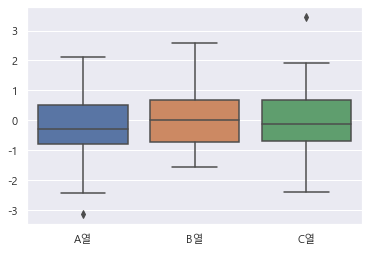

In [67]:
# 박스 플롯을 이요한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

In [68]:
# 이상값 계산하는 함수
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column] < lowest) | (df[column] > highest)].index
    return outlier_idx

# 함수 사용해서 이상값 확인
outlier_idx = get_outlier(df=boxdata, column='B열', weight=1.5)

outlier_idx

Int64Index([], dtype='int64')

In [69]:
# 이상값 삭제
boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

(100, 3)

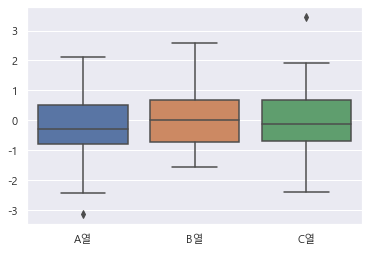

In [70]:
# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

In [71]:
# 함수 사용해서 이상값 확인
outlier_idx = get_outlier(df=boxdata, column='A열', weight=1.5)

outlier_idx

Int64Index([98], dtype='int64')

In [72]:
# 이상값 삭제
boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

(99, 3)

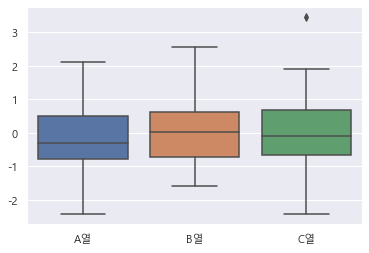

In [73]:
# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

In [74]:
boxdata.shape

(99, 3)